<a href="https://colab.research.google.com/github/ryanditata/dataMining/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Regresi: Prediksi Efisiensi Bahan Bakar (Auto MPG)

## 1. Ringkasan Data
Dalam proyek ini, saya menggunakan dataset **Auto MPG** yang berisi data teknis dari berbagai mobil (seperti jumlah silinder, berat, tenaga kuda, dll). Dataset ini memiliki 398 baris data.

* **Variabel Target ($Y$):** `mpg` (Miles Per Gallon) - Angka ini menunjukkan seberapa hemat bahan bakar mobil tersebut. Semakin tinggi angkanya, semakin irit.
* **Variabel Fitur ($X$):** `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model year`, `origin`.

## 2. Tujuan Analisis
Tujuan dari analisis ini adalah membangun model **Regresi Linier** yang dapat memprediksi efisiensi bahan bakar (`mpg`) berdasarkan spesifikasi teknis mobil. Wawasan ini berguna bagi produsen mobil untuk memahami faktor apa saja yang membuat mobil menjadi boros atau irit.

In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Memuat Dataset
df = pd.read_csv("auto-mpg.csv")

# Melihat 5 baris pertama data
print("Sampel Data Awal:")
df.head()

Sampel Data Awal:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 3. Persiapan Data (Data Preprocessing)
Sebelum melatih model, saya melakukan pembersihan data. Ditemukan bahwa kolom `horsepower` memiliki nilai "?" yang menandakan data hilang (*missing values*). Saya mengubah tanda tanya tersebut menjadi `NaN` dan menghapus baris data yang kosong agar tidak mengganggu proses pelatihan model.

In [ ]:
# Membersihkan data: Mengganti '?' dengan NaN dan menghapus baris kosong
df = df.replace("?", np.nan)
df = df.dropna()

# Mengubah tipe data horsepower menjadi float (angka)
df['horsepower'] = df['horsepower'].astype(float)

# Menentukan Fitur (X) dan Target (y)
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = df['mpg']

# Membagi data menjadi 80% Latih (Train) dan 20% Uji (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 313
Jumlah data uji: 79


## 4. Perbandingan Model
Untuk mencari hasil terbaik, saya membandingkan 4 variasi model regresi:
1.  **Linear Regression:** Model dasar tanpa regularisasi.
2.  **Ridge Regression:** Menggunakan regularisasi L2 untuk mencegah overfitting.
3.  **Lasso Regression:** Menggunakan regularisasi L1, yang bisa menonjolkan fitur terpenting.
4.  **Polynomial Regression (Derajat 2):** Menangkap hubungan non-linier (melengkung) antar variabel.

In [ ]:
# 1. Standard Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 2. Ridge Regression (L2 regularization)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# 3. Lasso Regression (L1 regularization)
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# 4. Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

## 5. Evaluasi Hasil
Saya menggunakan metrik **R-Squared ($R^2$)** untuk mengukur akurasi. Nilai $R^2$ mendekati 1.0 berarti model sangat akurat dalam menjelaskan variasi data.

In [ ]:
models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge_reg,
    "Lasso Regression": lasso_reg,
    "Polynomial Regression": poly_reg
}

print("--- Hasil Evaluasi Model ---")
for name, model in models.items():
    if name == "Polynomial Regression":
        y_pred = model.predict(X_poly_test)
    else:
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name:22} : MSE = {mse:.3f}, R2 Score = {r2:.3f}")

--- Hasil Evaluasi Model ---
Linear Regression      : MSE = 10.711, R2 Score = 0.790
Ridge Regression       : MSE = 10.703, R2 Score = 0.790
Lasso Regression       : MSE = 10.712, R2 Score = 0.790
Polynomial Regression  : MSE = 7.157, R2 Score = 0.860


## 6. Temuan Utama (Key Insights)

### a. Model Terbaik
Berdasarkan perbandingan di atas, **Polynomial Regression** memberikan akurasi tertinggi (R2 Score sekitar **0.86**). Ini menunjukkan bahwa hubungan antara spesifikasi mobil dan konsumsi bensin **tidak selalu lurus (linier)**.
*Contoh:* Menambah berat mobil dari 1 ton ke 2 ton mungkin dampaknya berbeda drastis dibandingkan menambah dari 2 ton ke 3 ton.

### b. Faktor Paling Berpengaruh
Di bawah ini saya memvisualisasikan koefisien dari model Linear untuk melihat fitur mana yang paling memengaruhi boros/iritnya mobil.

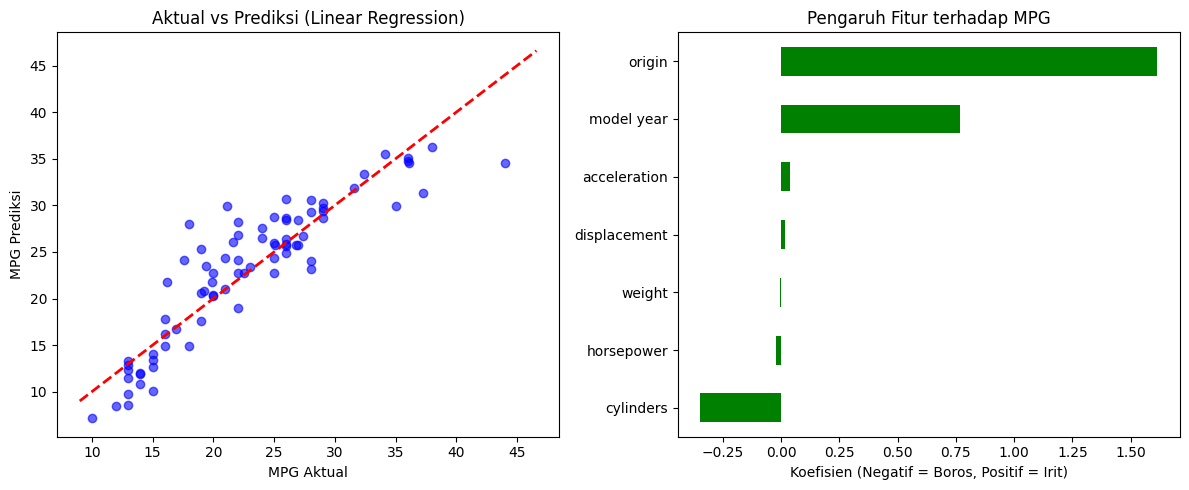

Interpretasi Koefisien:
Fitur terpenting negatif (membuat boros): cylinders
Fitur terpenting positif (membuat irit): origin


In [ ]:
# Visualisasi Prediksi vs Aktual (Linear Regression)
plt.figure(figsize=(12, 5))

# Plot 1: Sebaran Prediksi
plt.subplot(1, 2, 1)
plt.scatter(y_test, lin_reg.predict(X_test), alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Garis diagonal sempurna
plt.title("Aktual vs Prediksi (Linear Regression)")
plt.xlabel("MPG Aktual")
plt.ylabel("MPG Prediksi")

# Plot 2: Pentingnya Fitur (Feature Importance)
plt.subplot(1, 2, 2)
coef_series = pd.Series(lin_reg.coef_, index=X.columns).sort_values()
coef_series.plot(kind='barh', color='green')
plt.title("Pengaruh Fitur terhadap MPG")
plt.xlabel("Koefisien (Negatif = Boros, Positif = Irit)")

plt.tight_layout()
plt.show()

# Menampilkan interpretasi teks
print("Interpretasi Koefisien:")
print(f"Fitur terpenting negatif (membuat boros): {coef_series.index[0]}")
print(f"Fitur terpenting positif (membuat irit): {coef_series.index[-1]}")

## 7. Keterbatasan & Langkah Selanjutnya
* **Kesimpulan:** Kita berhasil membangun model dengan akurasi 86%. Faktor seperti `weight` (berat) memiliki dampak negatif besar terhadap efisiensi (semakin berat, semakin boros), sedangkan `model year` berdampak positif (mobil lebih baru cenderung lebih irit).
* **Keterbatasan:** Model ini dilatih pada data mobil lama (tahun 70-80an). Prediksi mungkin kurang akurat jika diterapkan pada mobil modern (hybrid/listrik).
* **Langkah Selanjutnya:** Menambahkan data mobil tahun terbaru untuk memperbarui model agar relevan dengan teknologi saat ini.